Utilizaremos el conjunto de datos CIFAR-10, que es un conjunto de datos de imágenes en color de 32x32 píxeles dividido en 10 clases diferentes (como aviones, coches, pájaros, gatos, etc.). El conjunto de datos CIFAR-10 consta de 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba que se pueden descargar en https://www.cs.toronto.edu/~kriz/cifar.html.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

2023-06-24 23:53:16.950657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Cargamos el conjunto de datos CIFAR-10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 180s 1us/step


In [3]:
# Normalizamos los datos

X_train = X_train / 255
X_test = X_test / 255

In [4]:
# Definir los parámetros del modelo

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [5]:
# Construir el modelo

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [6]:
# Compilar el modelo

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [7]:
# Entrenar el modelo

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=0,
          validation_split=validation_split)

In [8]:
# Evaluar el modelo

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.6672999858856201
Test loss: 5.465488910675049


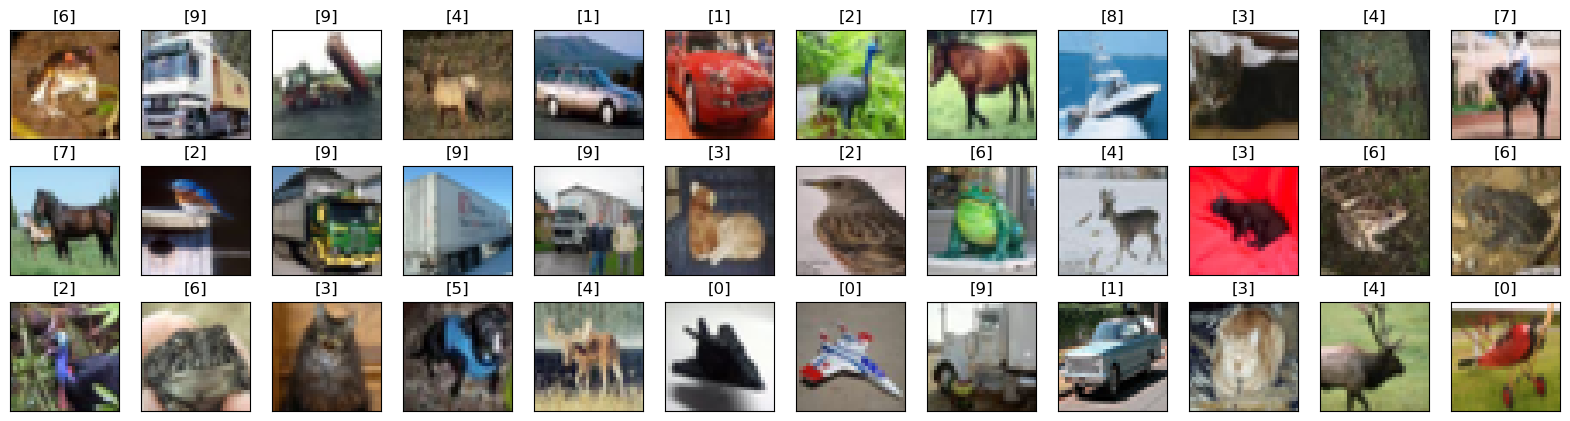

In [9]:
# Vamos a visualizar algunas imágenes del conjunto de datos CIFAR-10

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))
    ax.set_title("{}".format(y_train[i]))
plt.show()

In [10]:
# Ahora vamos a usar el modelo para hacer predicciones sobre algunas imágenes del conjunto de datos CIFAR-10

predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


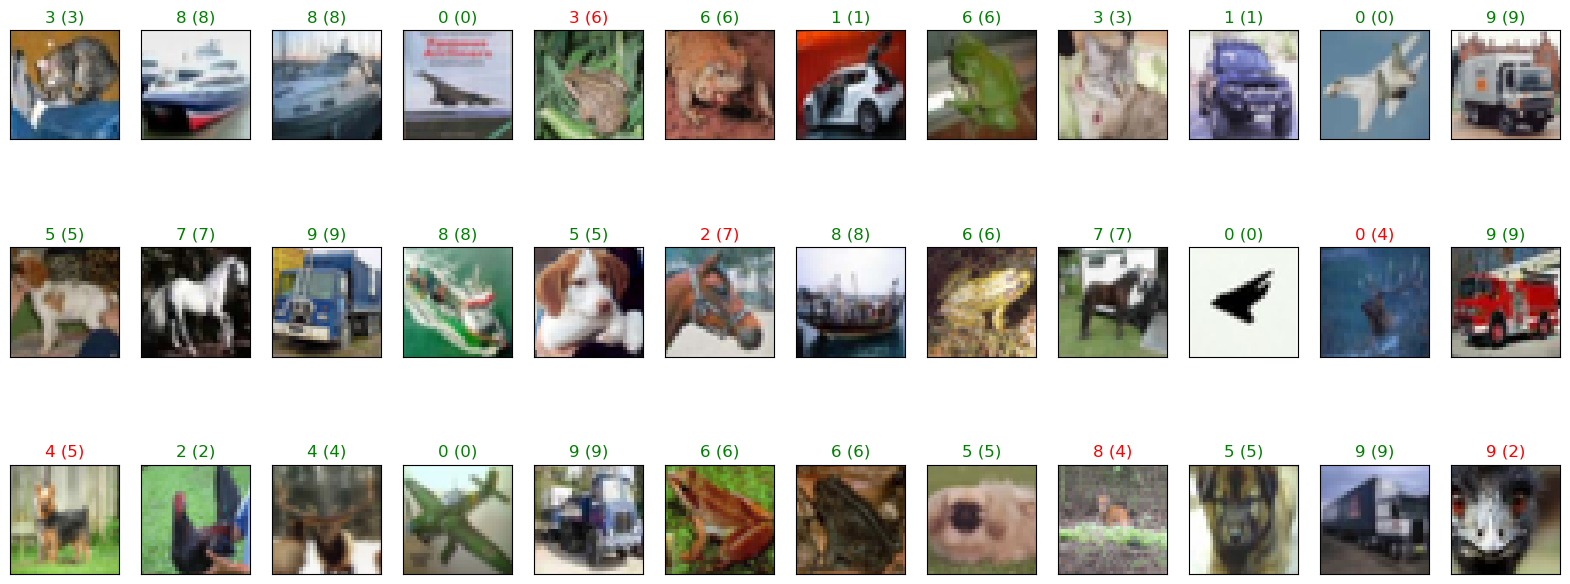

In [11]:
# Vamos a visualizar algunas imágenes del conjunto de datos CIFAR-10 junto con sus predicciones

fig = plt.figure(figsize=(20, 8))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[i]))
    pred_idx = np.argmax(predictions[i])
    true_idx = y_test[i][0]
    ax.set_title("{} ({})".format(pred_idx, true_idx),
                 color=("green" if pred_idx == true_idx else "red"))
plt.show()